# Project Python Foundations: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* **order_id:** Unique ID of the order
* **customer_id:** ID of the customer who ordered the food
* **restaurant_name:** Name of the restaurant
* **cuisine_type:** Cuisine ordered by the customer
* **cost:** Cost of the order
* **day_of_the_week:** Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* **rating:** Rating given by the customer out of 5
* **food_preparation_time:** Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* **delivery_time:** Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')


### Understanding the structure of the data

In [2]:
# read the dataset
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [3]:
df.shape

(1898, 9)

#### Observations:
- DataFrame contain total 1898 rows and 9 columns.

### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- All columns have 1898 entries and there is no missing values.
- resturant_name, cuisine_type and day_of_the_week is object data type but should be categorical. 

### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [5]:
# Coverting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data
df['restaurant_name'] = df['restaurant_name'].astype("category")# convert the restaurant_name from object to category
df['cuisine_type'] = df['cuisine_type'].astype("category")# convert the cuisine type from object to category
df['day_of_the_week'] = df['day_of_the_week'].astype("category")# convert the day_of_the_week from object to category
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
- There are total 5 Numeric columns, 3 category columns and one object column.
- Memory space of the DataFrame reduced to 102.7+ KB from 133.6+ KB due to converting 3 object columns to categorical columns.

### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)
**Summary of the data**

In [6]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [7]:
#uppress scientific notation in Pandas globally in jupyter notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [8]:
# Transpose matrics shift rows to columns which make better readablity of the DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00000,1477495.50000,548.04972,1476547.00000,1477021.25000,1477495.50000,1477969.75000,1478444.00000
customer_id,1898.00000,171168.47840,113698.13974,1311.00000,77787.75000,128600.00000,270525.00000,405334.00000
cost_of_the_order,1898.00000,16.49885,7.48381,4.47000,12.08000,14.14000,22.29750,35.41000
food_preparation_time,1898.00000,27.37197,4.63248,20.00000,23.00000,27.00000,31.00000,35.00000
delivery_time,1898.00000,24.16175,4.97264,15.00000,20.00000,25.00000,28.00000,33.00000


#### Observations:
- Lowest order id is 1476547 and highest order id is 1478444 and total 1898 values fall in between this two
- Lowest customer id is 1311 and highest is 405334. other values fall between this two
- Mininum cost_of_the_order is 4.47, max is 35.41 and avg is 16.4988
- Food preparation varies from 20 mins to 35 mins but average preparation time is 27.37 min
- delivery_time varies from 15 mins to 33 min where average is 24.16 mins.

*By default the describe() function shows only the summary of numeric variables only. Let's check the summary of non-numeric variables.*  

In [9]:
df.describe(exclude=np.number).T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


#### Observations from Non Numeric columns:
- There are total 178 unique restaurant_name in the dataset and shake shack appears 219 times
- There are total 14 unique cuisine are there and American cuisine type appears 584 times
- There are total 1351 orders out of 1898 in the weekend
- There are unique 4 ratings are there including Not given and out of them Not given is most frequent which appears 736 times.

### **Question 5:** How many orders are not rated? (0.5 mark)

In [10]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
- There are total 736 orders are not rated.

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

### Exploratory Data Analysis (EDA)


**We have developed two functions to observer the data for exploratory analysis**
  - histogram_boxplot() for numerical variables analysis which gives a historam and boxplot
  - Labeled_barplot() to observe categorical variables gives barplot

#### Let's explore the categorical variables now
* Let us explore the numerical variables first
* While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
* Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
* This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

In [11]:

# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, xlabel = None,title = "Representation in Boxplot and Histogram",figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, palette='Set3'
    )  # boxplot will be created and a star will indicate the mean value of the column
    
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
   )
    if xlabel: 
        ax_hist2.set(xlabel=xlabel)
        ax_box2.set(xlabel = None)
    if title: ax_box2.set(title=title)
    plt.show()
    
     # Add median to the histogram

#### Observation in order_id

In [12]:
# Show the total number of Order
df['order_id']

0       1477147
1       1477685
2       1477070
3       1477334
4       1478249
         ...   
1893    1476701
1894    1477421
1895    1477819
1896    1477513
1897    1478056
Name: order_id, Length: 1898, dtype: int64

In [13]:
# Number of unique value in order_id
df['order_id'].nunique()

1898

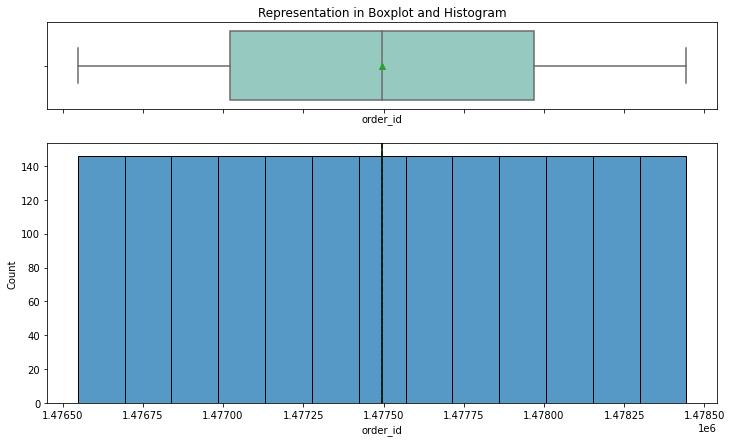

In [14]:
# Now lets see how the order id is distributed in the Boxplot and histogram
histogram_boxplot(df, 'order_id')# Calls the function and pass feature 'order_id'

#### Observation
- order_id is uniform distributed in the graph
- Mean and Median falls in the same place which is 1477500

#### Observation in customer_id

In [15]:
# Check the total customer_id
df['customer_id']

0       337525
1       358141
2        66393
3       106968
4        76942
         ...  
1893    292602
1894    397537
1895     35309
1896     64151
1897    120353
Name: customer_id, Length: 1898, dtype: int64

In [16]:
# Check unique customer_id
df['customer_id'].nunique()

1200

In [17]:
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

In [18]:
df['customer_id'].value_counts().head() ## Check the top 5 customers' IDs who have ordered most frequently.

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

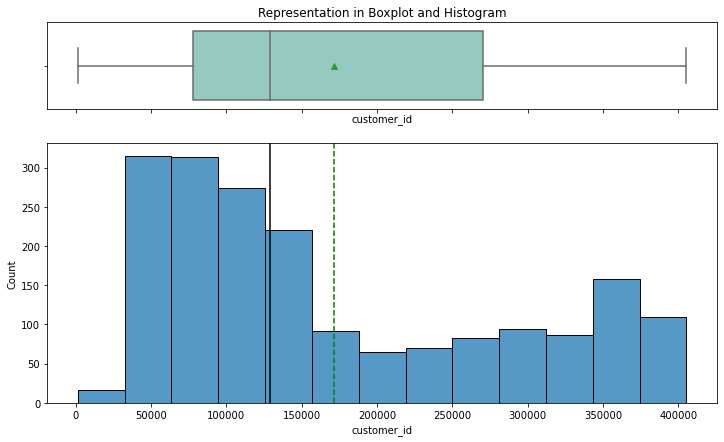

In [19]:
histogram_boxplot(df, 'customer_id')

#### Observations from Diagram:
- Customer_id is rightly skewed
- Majority of the customer_id is fallen between 50000 to 150000 in the dataset
- Basically, there are 1200 unique customers in the dataset who give 1898 orders. 

#### Observation in cost_of_the_order

In [20]:
#Total Number of order
len(df['cost_of_the_order'])

1898

In [21]:
# Unique values of cost_of_the_order in the dataset
df['cost_of_the_order'].nunique()

312

In [22]:
# Top Five cost_of_the_order
df['cost_of_the_order'].value_counts().head()

12.18000    86
12.13000    82
12.23000    47
24.20000    42
29.10000    37
Name: cost_of_the_order, dtype: int64

In [23]:
# Average cost_of_the_order
np.mean(df['cost_of_the_order'])

16.498851422550082

In [24]:
# Median cost_of_the_order
np.median(df['cost_of_the_order'])

14.14

In [25]:
#Most Frequent cost_of_the_order
from scipy import stats
stats.mode(df['cost_of_the_order'])

ModeResult(mode=array([12.18]), count=array([86]))

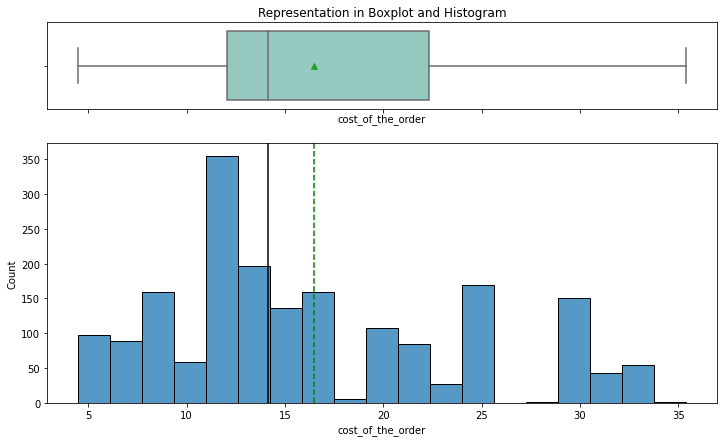

In [26]:
histogram_boxplot(df, 'cost_of_the_order')

#### Observations from Diagram:
- Cost_of_the_order is  slightly right skewed
- Average cost_of_the_order is 16.4988, Median cost_of_the_order is 14.14 and cost_of_the_order 12.18 dollars appears 86 times
- Most of the cost_of_the_order falls between 10 to 17 dollar

#### Observation in food_preparation_time

In [27]:
# Total food_preparation_time observations
len(df['food_preparation_time'])

1898

In [28]:
# Number of values in observations
df['food_preparation_time'].value_counts()

21    135
23    123
27    123
22    123
28    121
24    121
20    119
30    119
33    118
35    117
31    116
26    115
25    113
34    113
32    113
29    109
Name: food_preparation_time, dtype: int64

In [29]:
# Unique number of observations
df['food_preparation_time'].nunique()

16

In [30]:
# Mean food preparation time
df['food_preparation_time'].mean()

27.371970495258168

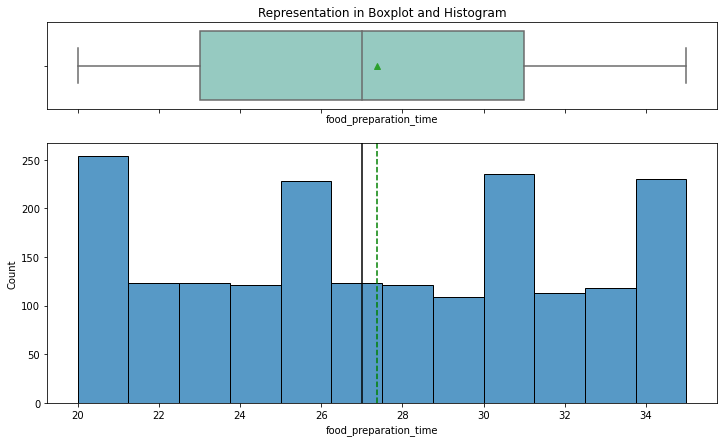

In [31]:
histogram_boxplot(df, 'food_preparation_time')

Observations:
- Average food preparation time is 27.37197 minutes.
- Graph is almost uniformly distributed around mean.
- Food preparation time varies from 20 minutes to 35 minutes.

#### Observation in delivery_time

In [32]:
# Total delivery_time observations
len(df['delivery_time'])

1898

In [33]:
# value_counts of each observations
df['delivery_time'].value_counts()

24    162
28    148
29    148
26    141
27    138
30    133
25    120
19     90
16     90
20     88
15     87
22     85
18     83
21     81
17     78
23     77
32     59
33     49
31     41
Name: delivery_time, dtype: int64

In [34]:
# Percentage of total 7 observations
df['delivery_time'].value_counts().head(7).sum() / len(df['delivery_time']) * 100

52.160168598524756

In [35]:
# Unique value of observations
df['delivery_time'].nunique()

19

In [36]:
# Average delivery_time
np.mean(df['delivery_time'])

24.161749209694417

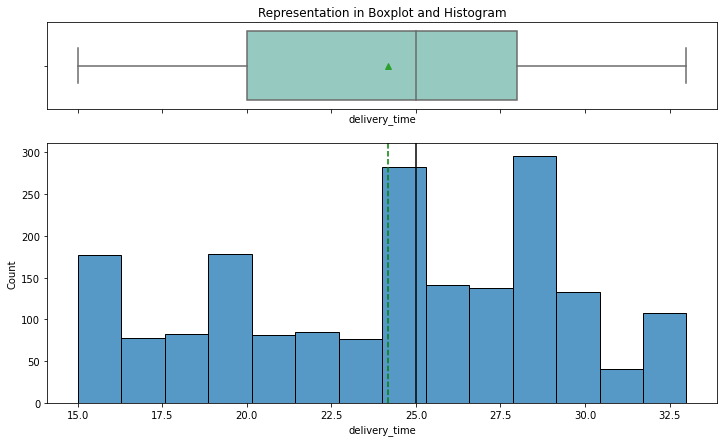

In [37]:
histogram_boxplot(df, 'delivery_time')


#### Observations
- Delivery time is slightly left skewed
- Average delivery time of the food is 24.161792
- out of 16 delivery_time observations, top 7 observations(24,28,29,26,27,30)contain 52.16% of total data

#### Let's explore the categorical variables now

In [38]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [39]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

####  Obsrvations in cuisine_type

In [40]:
# Total number of observations
len(df['cuisine_type'])

1898

In [41]:
# Unique observations
df['cuisine_type'].unique()

['Korean', 'Japanese', 'Mexican', 'American', 'Indian', ..., 'Thai', 'Southern', 'French', 'Spanish', 'Vietnamese']
Length: 14
Categories (14, object): ['American', 'Chinese', 'French', 'Indian', ..., 'Southern', 'Spanish', 'Thai', 'Vietnamese']

<Figure size 720x504 with 0 Axes>

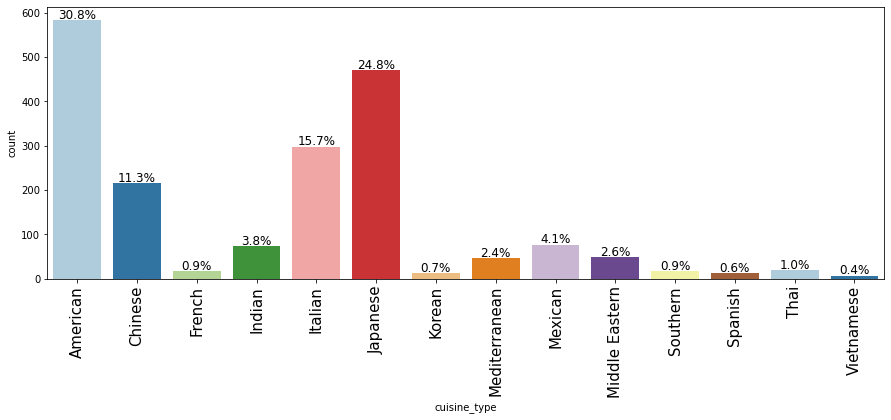

In [42]:
# Define the figure size
plt.figure(figsize=(10,7))
# Function call labeled_barplot for cuisine_type categorical feature
labeled_barplot(df, 'cuisine_type', perc=True)

#### Observations:
- American cuisine_type contain highest 30.8% order followed by japanese 24.8%, Italian 15.7% and Chinese 11.3%
- On the other hand, vietnamese(0.4%), spanish(0.6%) and korean(0.7%) contain lowest three values.

In [43]:
# Find out the restaurant that serve the American, Japanese, Chinese, Italian cuisine that  contain 82.6 percent of the order
df[df['cuisine_type'].isin(['American','Japanese','Italian','Chinese'])][['restaurant_name','cuisine_type']].groupby(by ='restaurant_name').count().sort_values(by = 'cuisine_type',ascending=False)

,cuisine_type
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Song Thai Restaurant & Bar,0
Spice Thai,0
Dos Caminos Soho,0


#### Observations:
- Foodhub company should work more closely with the restaurant like shake shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm	who gives the most of the revenue of the company.

####  Obsrvations in day_of_the_week

<Figure size 720x504 with 0 Axes>

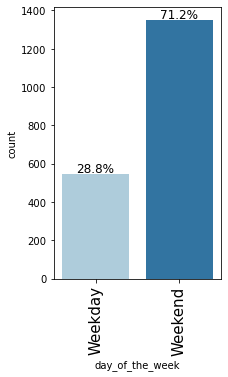

In [44]:
#Define the figure size for day_of_the_week
plt.figure(figsize=(10,7))
# Call function labeled_barplot for day_of_the_week categorical feature
labeled_barplot(df, 'day_of_the_week', perc=True)

#### Observations:
- 71.2% Order is given in the weekend whereas only 28.8% Order is given on weekdays.


###  Obsrvations in rating

<Figure size 1080x504 with 0 Axes>

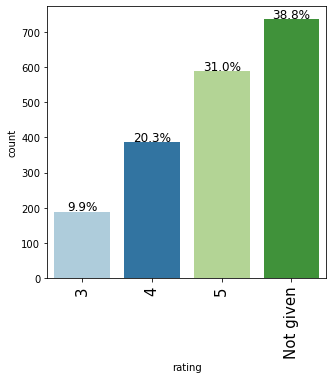

In [45]:
# Define the figure size
plt.figure(figsize=(15,7))
# call function labeled_barplot() for rating object variable
labeled_barplot(df, 'rating', perc=True)


#### Observations;
- 38.8 percent dataset values does not contain any rating.
- 31 Percent customer gave rating 5.
- 20.3 percent  customer gave rating 4 followed by 9.9 percent customer who gave rating 3.

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [46]:
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
* Shake shack receive highest 219 orders followed by The Meatball Shop 132, Blue Ribbon Sushi 119, Blue Ribbon Fried Chicken 96 and Parm 68


### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

In [47]:
df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().head(1)

American    415
Name: cuisine_type, dtype: int64

#### Observations:
* American cuisine is the most popular in the weekend.
* American cuisine followed by Japanese and Italian

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [48]:
# Total number of orders where cost_of_the_order is above 20 dollars
df[df['cost_of_the_order'] > 20]['order_id'].count()

555

In [49]:
# Percentage of cost_of_the_order above 20 dollar
round(df[df['cost_of_the_order'] > 20]['order_id'].count() / len(df['cost_of_the_order']) * 100, 2)

29.24

#### Observations:
* There are total 555 observations where cost_of_the_order is above 20 dollars
* Cost_of_the_order above 20 dollars contain 29.24% observations in the dataset. 


### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [50]:
np.mean(df['delivery_time'])

24.161749209694417

#### Observation:
* Average delivery time is 24.16175 minutes.

### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [51]:
df[df['cost_of_the_order'] == np.max(df['cost_of_the_order'])]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41000,Weekday,4,21,29


#### Observations:
* Customer_id 62359 ordered highest where cost_of_the_order is 35.41 dollars.
* Name of the cuisine_type is Mediterranean and restaurant_name is pylos.


### Bivariate Analysis

### Question 12: Perform bivariate analysis to explore relationships between the important variables in the dataset. (7 marks)


#### Numerical  vs Numerical 

In [52]:
# Select numerical columns from dataset except order_id and customer_id
cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

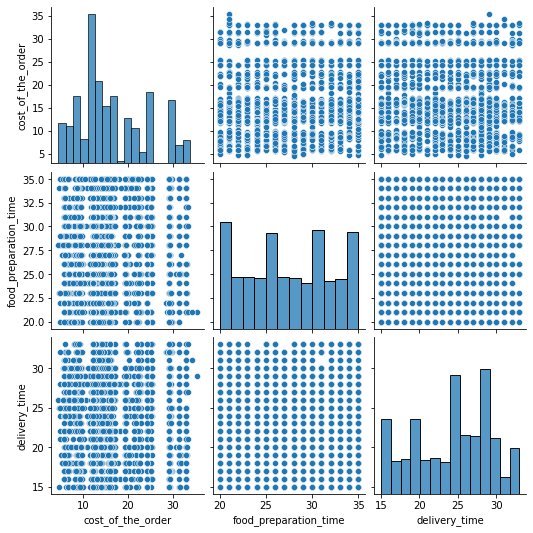

In [53]:
# Now see how the Numeric column values are plotted in the dataset 
sns.pairplot(df[cols])

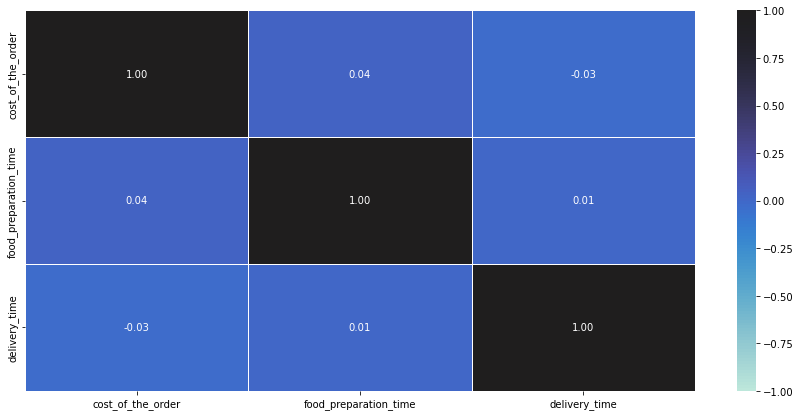

In [54]:
#Find the correlation Among the numerical variables except order_id and customer_id
cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
# Plot the heatmap 
plt.figure(figsize=(15, 7))
sns.heatmap(df[cols].corr(), annot=True,linewidths=0.5, vmin=-1, vmax=1, fmt=".2f", center = 1 )
plt.show()

#### Obsrvations:
* In the dataset we can see the numerical variables are weekly correlated to each other.
* In the dataset food_preparation_time and cost_of_order is top positively correlated and the value is 0.04
* Cost_of_the_order and delivery_time is negatively correlated and the value is -0.03.

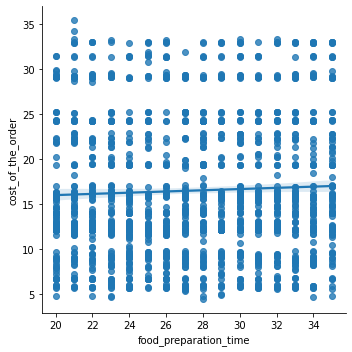

In [55]:
# Now we will observe the food_delivery_time and cost_of_order in reg plot
# Food preparation time and cost of the order 
sns.lmplot(x='food_preparation_time', y = 'cost_of_the_order', data = df)

#### Observation:
* food_preparation_time and cost_of_the_order is weekly positively correlated.
* so, if the food_preparation_time increases cost_of_the_order also increase.

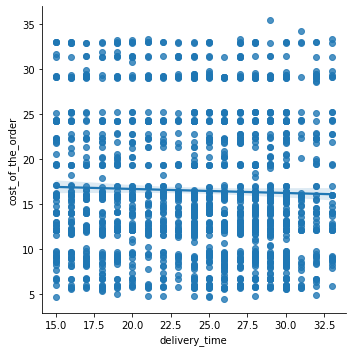

In [56]:
# Food preparation time and cost of the order
sns.lmplot(x='delivery_time', y = 'cost_of_the_order', data = df)

#### Observations:
* Cost_of_the_order and delivery_time is weakly negatively coorelated
* If the delivery_time increases then cost_of_the_order decrease

#### Categorical vs Numerical 

#### Cuisine vs Cost of the order

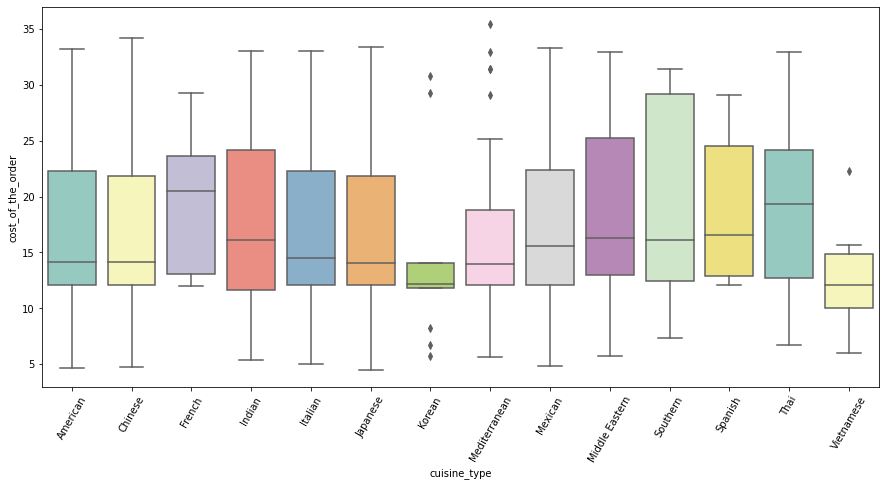

In [57]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'Set3')
plt.xticks(rotation = 60)
plt.show()

#### Observations:
* We can see that American, Italian, chinese and japanese having the almost same cost_of_the_order which varies 12.5 dollars to 22.5 dollars.
* vietnamese cuisine_type is the cheapest one which varies from 6 dollar to 14 dollars.
* There are a lot of outlier in Mediterranean and korean cuisine_type
* South Inidan, Middle eastern, and Thai cuisine type is a bit expensive.

#### Cuisine vs Food Preparation time

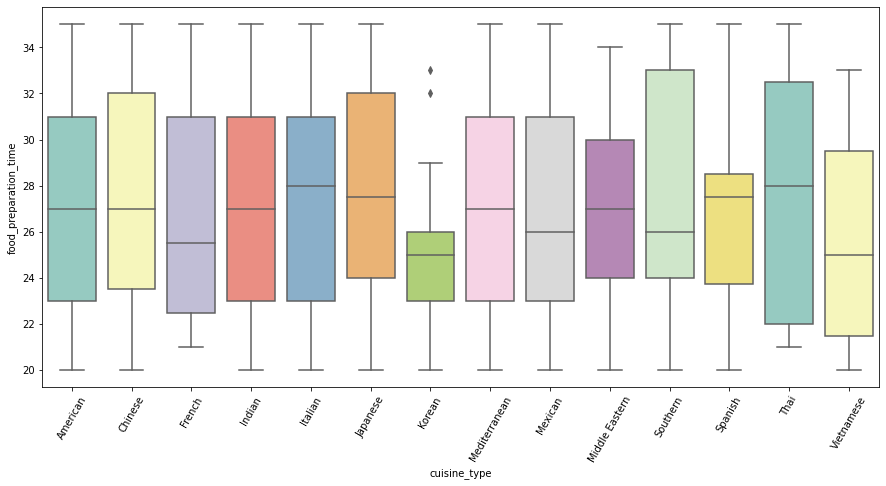

In [58]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
# Boxplot for cuisine type and food preparation time
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'Set3')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

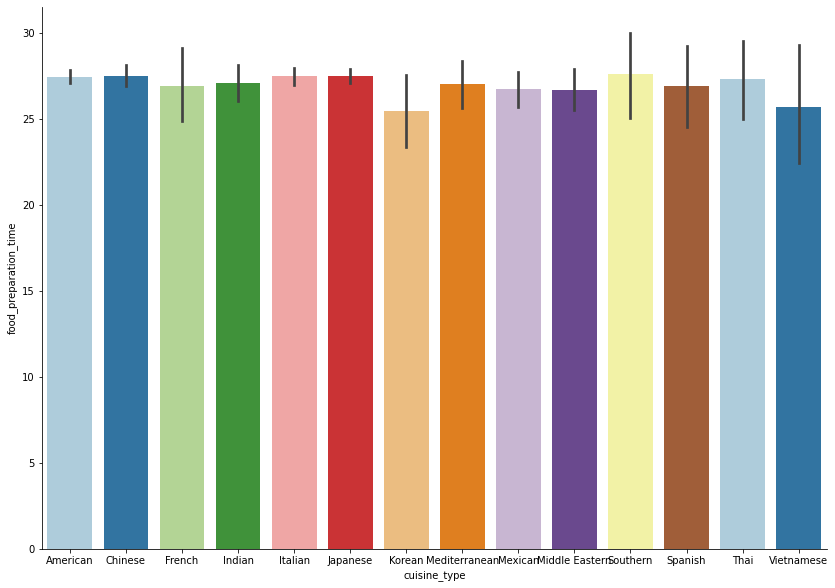

In [59]:
# Barplot for the cuisine_type and food_preparation_time
sns.catplot(x = "cuisine_type", y = "food_preparation_time", data = df, kind = 'bar', palette='Paired',height=8.27,aspect=11.7/8.27)

#### Observations:
* Vietnamese food take less time to prepare.
* American, Indian and Italian cuisine_type take almost same amount of time.
* On the other hand,southern take more food_preparation_time

#### Day of the Week vs Delivery time

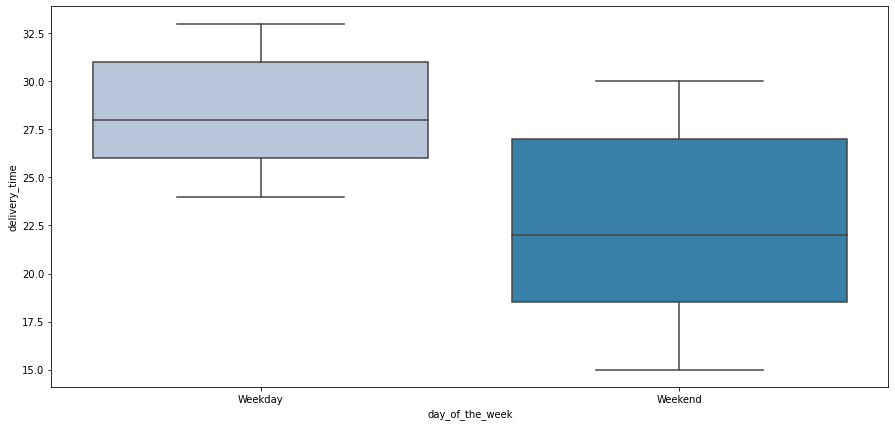

In [60]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

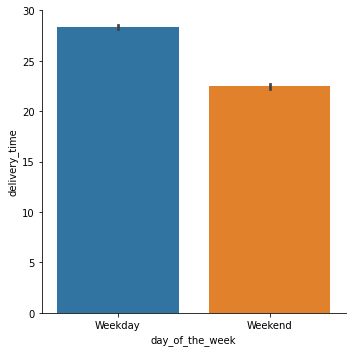

In [61]:
# Lets observe the bar plot of the above variables
sns.catplot(x = 'day_of_the_week', y = 'delivery_time', data =df, kind ='bar')

#### Observations:
* delivery_time in the weekend is approx 22.5 minutes.
* delivery_time in the weekday is approx 27.5 minutes.
* delivery_time in the weekend is faster than weekdays.

#### Rating vs Delivery time

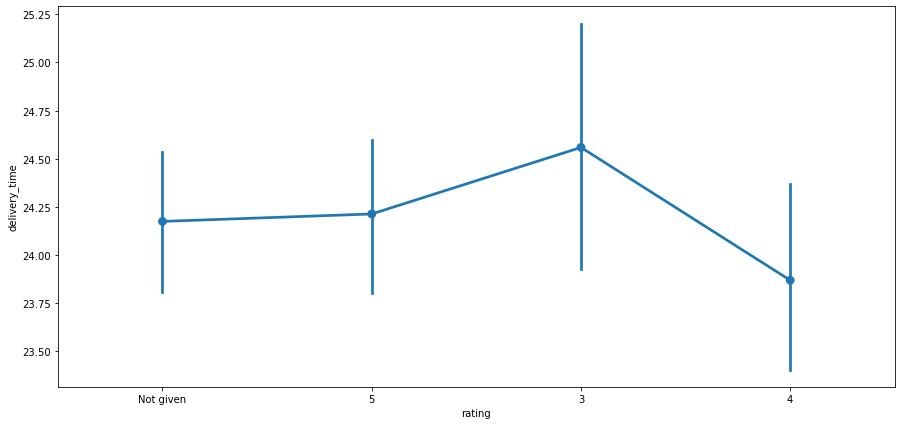

In [62]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Observations:
* if the delivery_time is 24.20 minutes then it gives 5 star rating, while 23.80 minutes give 4 star rating.
* so, if the delivery time is less then it gets good rating from the customer.

#### Rating vs Food preparation time

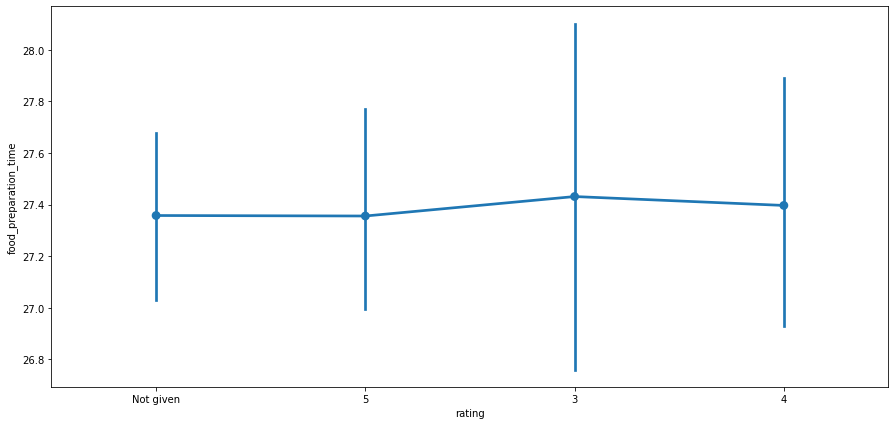

In [63]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time',data = df)  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

#### Observations:
* If the food_preparation_time is less then it gives best rating.
* It is clear that 27.3 minutes food_preparation_time gives rating 5 while 27.45 food_preparation_time gives rating 3.

#### Rating vs Cost of the order

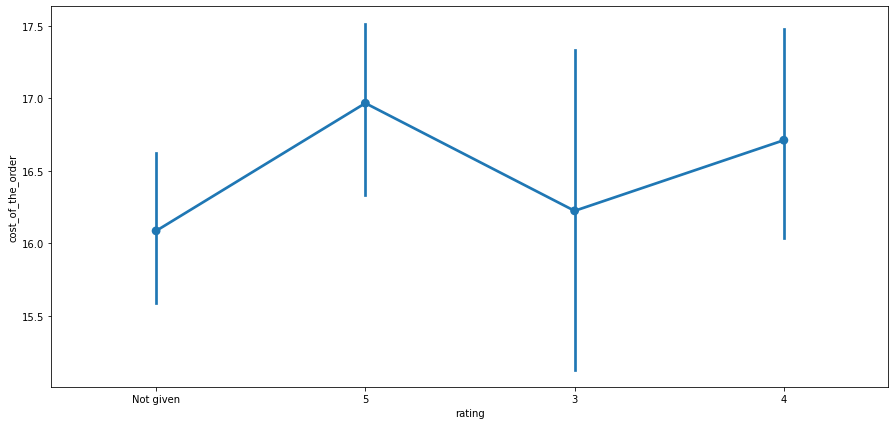

In [64]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order',data = df)   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

#### Observations:
* If the cost_of_the_order is more then rating is better.
* In around if the cost_of_the_order is 17 then customer give rating 5.

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [78]:
# Drop the 'Not given' values
df_modified = df[df['rating'] != 'Not given']
# since those 'Not given' values becomes naN so drop all those which gives all float type data
df_modified.dropna(inplace= True)
#Find out the restaurant that has the more than 50 ratings
df_modified['restaurant_name'].value_counts().head()


Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
RedFarm Broadway              41
Name: restaurant_name, dtype: int64

2       5
3       3
4       4
5       3
7       3
       ..
1889    3
1890    5
1893    5
1894    5
1896    5
Name: rating, Length: 1162, dtype: int32

In [66]:
# In the above we see that first 4 restaurant have more than 50 ratings. No we will check whether the average rating >4 or not

In [67]:
np.mean(df_modified[df_modified['restaurant_name'] == 'Shake Shack']['rating'])

4.1770183108611617e+130

In [68]:
np.mean(df_modified[df_modified['restaurant_name'] == 'The Meatball Shop']['rating'])

6.494697088756469e+81

In [69]:
np.mean(df_modified[df_modified['restaurant_name'] == 'Blue Ribbon Sushi']['rating'])

6.089773212786788e+70

In [70]:
np.mean(df_modified[df_modified['restaurant_name'] == 'Blue Ribbon Fried Chicken']['rating'])

5.552274147571181e+61

#### Observations:
* so Shake Shack, The Meatball Shop,Blue Ribbon Sushi,Blue Ribbon Fried Chicken get the promotional offer.

### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [71]:
# company charges the restaurant 25% on the orders having cost greater than 20 dollar
rev_25 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * 0.25

In [72]:
#15% on the orders having cost greater than 5 dollars
rev_15 = df[df['cost_of_the_order'] > 5]['cost_of_the_order'].sum() * 0.15
total_revenue = rev_25 + rev_15
total_revenue

8379.539499999999

#### Observations:
* Total revenue earned by the food company is 8379.5395.
* company earned more revenue on the orders greater than 5 dollar and less than 20 dollars.


### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [73]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [74]:
# total delivery time is food_preparation_time + delivery_time 
df[df['food_preparation_time'] + df['delivery_time'] > 60]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
7,1477859,89574,Barbounia,Mediterranean,5.97000,Weekday,3,33,30
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92000,Weekday,Not given,34,28
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20000,Weekend,4,35,26
24,1476714,363783,Cafe Mogador,Middle Eastern,15.86000,Weekday,Not given,32,29
54,1477760,130507,Jack's Wife Freda,Mediterranean,22.75000,Weekend,3,35,29
...,...,...,...,...,...,...,...,...,...
1869,1476923,50199,J. G. Melon,American,19.40000,Weekday,4,35,26
1873,1478148,261371,Shake Shack,American,22.31000,Weekend,Not given,35,28
1875,1478039,292343,Amy Ruth's,Southern,12.23000,Weekday,Not given,32,33
1880,1477466,222734,Shake Shack,American,13.97000,Weekend,5,35,27


In [75]:
# percentage of orders that have more than 60 minutes of total delivery time
round(len(df[df['food_preparation_time'] + df['delivery_time'] > 60]) / len(df) * 100, 2)

10.54

#### Observations:
* There are total 200 observations where total delivery_time is greater than 60
* So, 10.54% of orders have more than 60 minutes of total delivery time


### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [76]:
# Find out the weekend data observations
df_wkend = df[df['day_of_the_week'] == 'Weekend']
# Total mean delivery time on weekend
np.mean(df_wkend['food_preparation_time'] + df_wkend['delivery_time'])

49.90673575129534

In [77]:
# Find out the weekdays data observations
df_wkday = df[df['day_of_the_week'] == 'Weekday']
# Total mean delivery time on weekend
np.mean(df_wkday['food_preparation_time'] + df_wkday['delivery_time'])

55.552102376599635

#### Observations:
* Average food delivery_time on weekdays is 49.9067 minutes
* Average food delivery time on weekdays is 55.5521 minutes

### Conclusion 
*Food aggregator company like food hub give enormous impacts for food and service industry in New York and surrounding area. From my perspective, i think food hub company has make life easier both for busy professionals and students. There are many varieties of cuisine that can people choose by using food hub service. Despite all the great things, the downside is that company is not receiving full complement from the customers. customer are not giving feedback properly by providing rating properly.Overall 31 percent customer rated 5 and almost 20 percent customer rated 4. we can improve the customer experience by getting more feedback while using the app. There were only 1898 order_id were taken for analysis. If the order_id or observations are more, there will be more accurate outcome from analysis*.

### Recommendations
- It is clear from the analysis is that food hub company should work on the apps or promotional policy so that customer is encouraged to provide rating. 
- Food hub company should increase the more representative in the weekend for better support to the restauratnt who brings most revenue and to reduce the delivery time.
- Food hub company should take steps so that it can attract more customer on weekdays by providing attractive promotional offer and excellent customer experience.
- Food hub company generates more revenue and best rating when the cost_of_the_order is around 17 dollars so company should take steps so that it can achieve that.
- To improve in overall delivery time food hub company can provide incentive to delivery person so that it encourage them to deliver the food in time and with professionalism.


### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (3 marks)

#### Key Insights:
- **If the food_preparation_time and food_delivery_time is less customer give good rating, so Foodhub company should work on reducing delivery time.**


&nbsp;
- **Around 38.8 percent data does not have any rating, so Foodhub company must work so that it gets maximum rating from the customer for great feedback.**


&nbsp;
- **Around 31 pecernt customer gave 5 star rating, so Foodhub company must work so that it gets maximum  5 star rating from the customer using customer feedback.**


&nbsp;
- **71.2% Order is given in the weekend whereas only 28.8% Order is given on weekdays. so Food hub company should find out the mechanism to increase the food order in the weekdays. There might be various promotional offer that can help achiving this objective.**


&nbsp;
- **In the dataset, there are 1200 unique customer who give 1898 total orders, Foodhub company should give promotional offer to the existing customers who do not give multiple orders.** 


&nbsp;
- **Average cost_of_the_order is 16.4988 and Most of the cost_of_the_order falls between 10 to 17 dollar, so company can provide promotional offer like if the cost_of_the_order is above 25 dollars then 5 dollars off to increase the cost_of_the order.**


&nbsp;
- **Cost_of_the_order above 20 dollars contain 29.24% observations of the dataset, so maximum 70.76% cost_of_the_order is below the 20 dollars, so foodhub company can give promotional offer to increase the cost_of_the_order.**


&nbsp;
- **American cuisine_type contain highest 30.8% order followed by japanese 24.8%, Italian 15.7% and Chinese 11.3%.These, four cuisine_type contain 82.6 percent of data in the dataset. so foodhub company should be more tied restaurant that serve these food.**


&nbsp;
- **Foodhub company should work more closely with the restaurant like shake shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm who gives the most of the revenue of the company.**


&nbsp;
- **Most popular cuisine_type in the weekend is American, followed by japanese, Italian and chinese, so Foodhub company should increase more delivery representative in the weekend, so that it reduce total delivery time which enhance rating as well as good customer experience.**


&nbsp;
- **Delivery_time in the weekend is approx 22.5 minutes and delivery_time in the weekday is approx 27.5 minutes.since, we know almost 72 percent of order is placed on weekend, so we can say that foodhub company should reduce the delivery time in the weekdays so it gives good customer service and hence might increase orders in the weekdays.**


&nbsp;
- **It is found that if the cost_of_the_order is around 17 dollars then customer gives rating 5, if the cost_of_the_order is below 16 then customer either does not give rating or give bad rating. on the other hand, company earns maximum revenue from cost_of_the_order > 5 dollars and less than 20 dollars. so, company must plan the mechanism which keep the price around 17 dollar that provides maximum revenue and side by side provide great customer satisfaction by providing rating 5.**